# Heart Disease Exploratory Data Analysis

NOTE: The Kaggle dataset feature description was unclear. Assumptions about certain feature values were made by consulting Kaggle dataset description and discussion forums, as well as the UCI website.

### Attribute Information

Refer to diagram, "Dataset Attributes.png" file.

### Read file into DataFrame and explore data attributes

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [271]:
data = pd.read_csv('heart.csv')

#### Explore data columns and shape

In [272]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [273]:
data.shape

(303, 14)

#### Drop rows where thal=0 (since thal=0 maps to null in original dataset). Therefore, dataset row size reduced from 303 to 301.

In [274]:
data.loc[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [275]:
data.drop(index=[48,281],inplace=True)
print(data.shape)

(301, 14)


#### Explore dataset's min, max, mean column values & check for missing values

In [276]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.966777,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,1.398671,0.734219,2.328904,0.544850
std,9.110950,0.465534,1.032259,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.584347,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
age         301 non-null int64
sex         301 non-null int64
cp          301 non-null int64
trestbps    301 non-null int64
chol        301 non-null int64
fbs         301 non-null int64
restecg     301 non-null int64
thalach     301 non-null int64
exang       301 non-null int64
oldpeak     301 non-null float64
slope       301 non-null int64
ca          301 non-null int64
thal        301 non-null int64
target      301 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [278]:
data.isnull().sum() # Check for missing values and how many exist per Column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Visualization

#### Create New Dataframe (df) for easy Visualization of Categorical Columns

In [279]:
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [280]:
# For categorical features, replace numerical values with their corresponding string values

df['sex'].replace([0, 1], ['female', 'male'], inplace=True)
df['cp'].replace([0, 1, 2, 3], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], inplace=True)
df['fbs'].replace([0, 1], ['below 120', 'above 120'], inplace=True)
df['restecg'].replace([0, 1, 2], ['normal', 'ST-T wave abnomality', 'Left Ventricular Hyperatrophy'], inplace=True)
df['exang'].replace([0, 1], ['no chest pain', 'chest pain'], inplace=True)
df['slope'].replace([0, 1, 2], ['upsloping', 'flat', 'downsloping'], inplace=True)
df['ca'].replace([0, 1, 2, 3, 4], ['0 vessels', '1 vessels', '2 vessels', '3 vessels', '4 vessels'], inplace=True)
df['thal'].replace([1, 2, 3], ['fixed defect', 'normal blood flow', 'reversible defect'], inplace=True)
df['target'].replace([0, 1], ['no disease', 'disease'], inplace=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,above 120,normal,150,no chest pain,2.3,upsloping,0 vessels,fixed defect,disease
1,37,male,non-anginal pain,130,250,below 120,ST-T wave abnomality,187,no chest pain,3.5,upsloping,0 vessels,normal blood flow,disease
2,41,female,atypical angina,130,204,below 120,normal,172,no chest pain,1.4,downsloping,0 vessels,normal blood flow,disease
3,56,male,atypical angina,120,236,below 120,ST-T wave abnomality,178,no chest pain,0.8,downsloping,0 vessels,normal blood flow,disease
4,57,female,typical angina,120,354,below 120,ST-T wave abnomality,163,chest pain,0.6,downsloping,0 vessels,normal blood flow,disease


#### Visualize Features against Target

#### Target: Heart Disease Diagnosis 

Dataset is somewhat balanced for disease vs no disease. 
<br>
54% of patients have disease and 46% of patients do not have disease. 

In [281]:
print("%.4f" % (df[df['target']=='disease'].count()[0]/len(df)*100),'% of patients diagnosed with Heart Disease')
print("%.4f" % (df[df['target']=='no disease'].count()[0]/len(df)*100),'% of patients not diagnosed with Heart Disease')

54.4850 % of patients diagnosed with Heart Disease
45.5150 % of patients not diagnosed with Heart Disease


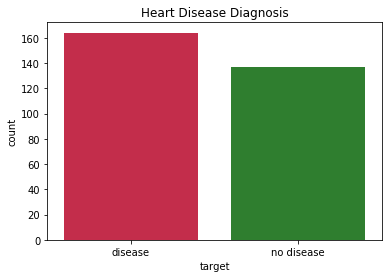

In [282]:
plt.title('Heart Disease Diagnosis')
sns.countplot(df['target'],palette=('crimson','forestgreen'))

#### Age vs Heart Disease Diagnosis

Heart Disease is prevalent with patients in their 40s to 50s.

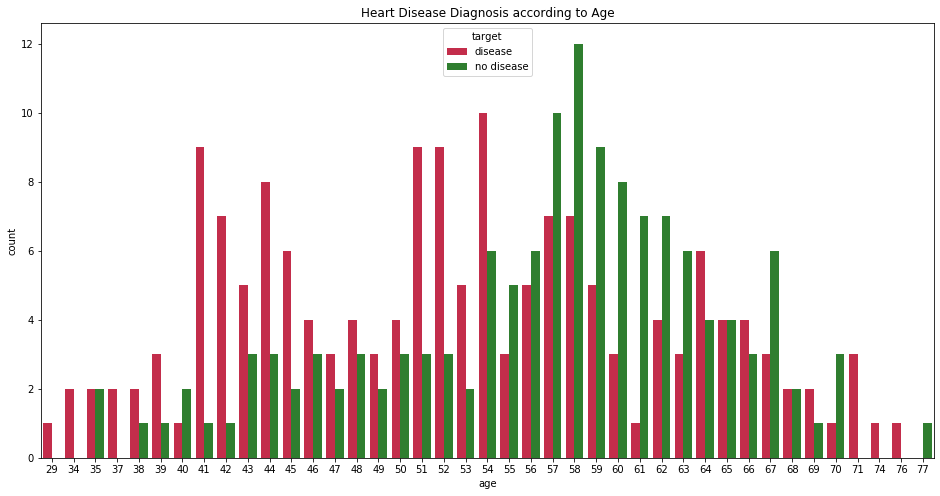

In [283]:
plt.figure(figsize=(16,8))
plt.title('Heart Disease Diagnosis according to Age')
sns.countplot(df['age'],hue=df['target'],palette=('crimson','forestgreen'))

#### Sex vs Heart Disease Diagnosis

There are approximately 68% Male patients and 32% Female patients. 
<br>
Females appear to have greater instances of heart disease than no disease. 
<br>
The amount of males diagnosed with disease is close to amount of males not diagnosed with disease. 

In [284]:
print("%.4f" % (df[df['sex']=='male'].count()[0]/len(df)*100), '% of patients are Male')
print("%.4f" % (df[df['sex']=='female'].count()[0]/len(df)*100), '% of patients are Female')

68.4385 % of patients are Male
31.5615 % of patients are Female


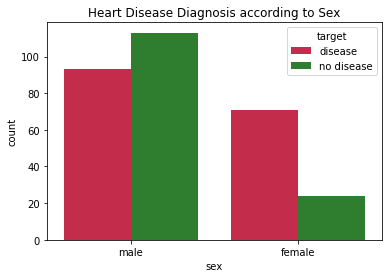

In [285]:
plt.title('Heart Disease Diagnosis according to Sex')
sns.countplot(df['sex'],hue=df['target'],palette=('crimson','forestgreen'))

#### Chest Pain vs Heart Disease Diagnosis

Interestingly, the type of pain with greatest count of disease is non-anginal (i.e. non chest pain).

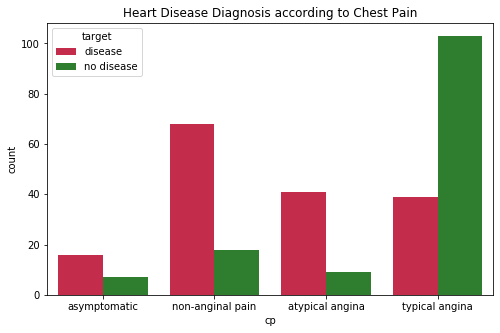

In [286]:
plt.figure(figsize=(8,5))
plt.title('Heart Disease Diagnosis according to Chest Pain')
sns.countplot(df['cp'],hue=df['target'],palette=('crimson','forestgreen'))

#### Resting Blood Pressure vs Heart Disease Diagnosis

When blood pressure is above 120, instances of disease increase sharply. 
<br>
Average Blood Pressure is around 132.

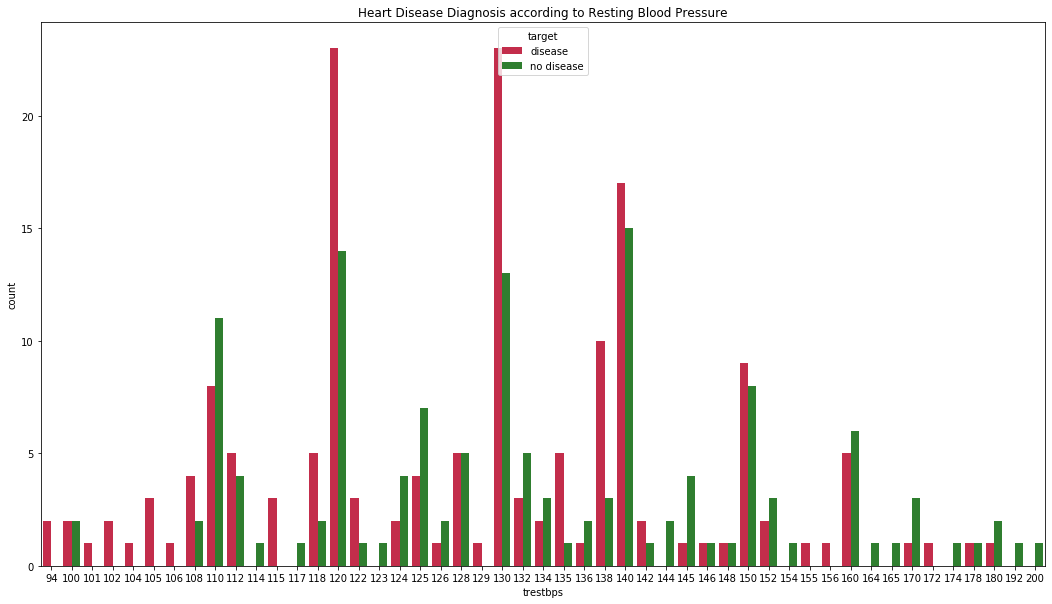

In [287]:
plt.figure(figsize=(18,10))
plt.title('Heart Disease Diagnosis according to Resting Blood Pressure')
sns.countplot(df['trestbps'],hue=df['target'],palette=('crimson','forestgreen'))

#### Cholestrol vs Heart Disease Diagnosis

Average cholestrol is around 247. The KDE (Kernel Density Estimate) plot shows the probability density of cholestrol for disease and no disease.

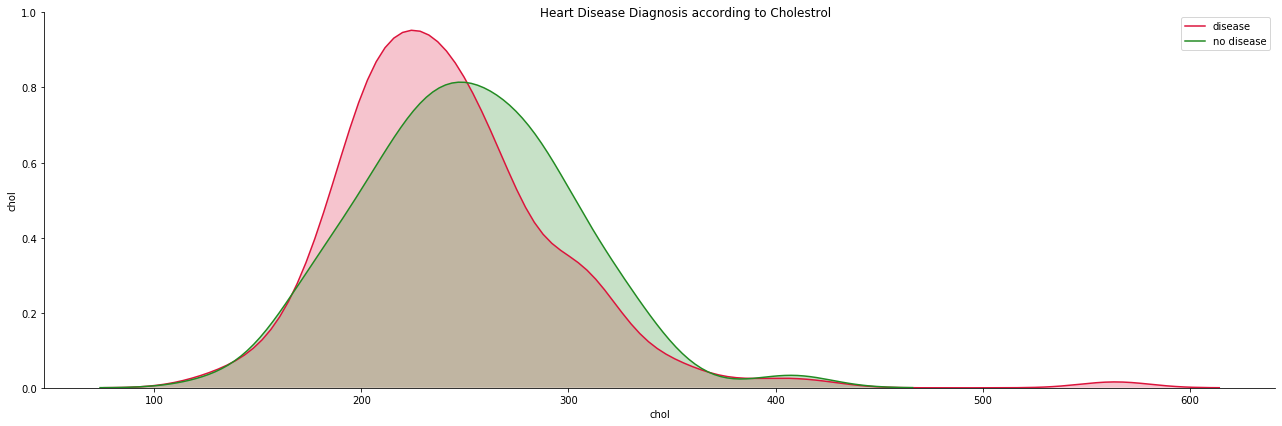

In [288]:
c = sns.pairplot(df,hue='target',vars=['chol'],palette=('crimson','forestgreen'),diag_kind='kde',aspect=3,height=6)
c.fig.suptitle('Heart Disease Diagnosis according to Cholestrol')
c._legend.remove()  # remove default pairplot legend as it was not appearing correctly
plt.legend()        # add legend 
plt.show(c)

#### Fasting Blood Sugar vs Heart Disease Diagnosis

Heart disease diagnosis is almost balanced in the two fasting blood sugar categories. 
<br>
Majority of patients have blood sugar below 120. 

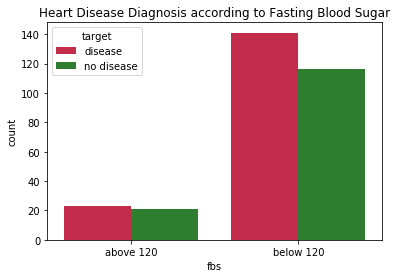

In [289]:
plt.title('Heart Disease Diagnosis according to Fasting Blood Sugar')
sns.countplot(df['fbs'],hue=df['target'],palette=('crimson','forestgreen'))

#### Resting Electrocardiographic Results vs Heart Disease Diagnosis

ST-T wave abnormality contributes the greatest to heart disease occurence.

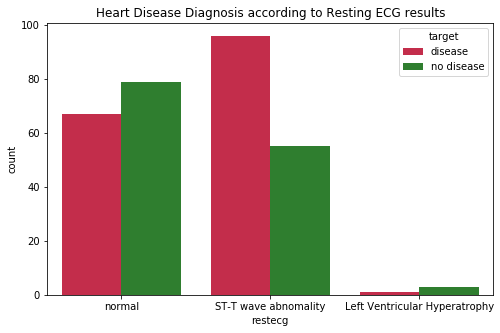

In [290]:
plt.figure(figsize=(8,5))
plt.title('Heart Disease Diagnosis according to Resting ECG results')
sns.countplot(df['restecg'],hue=df['target'],palette=('crimson','forestgreen'))

#### Maximum Heart Rate achieved vs Heart Disease Diagnosis

Average maximum heart rate is approximately 150. 
<br>
The KDE (Kernel Density Estimate) plot shows the probability density of maximum heart rate for disease and no disease; the greater the heart rate, the greater the chance of heart disease.

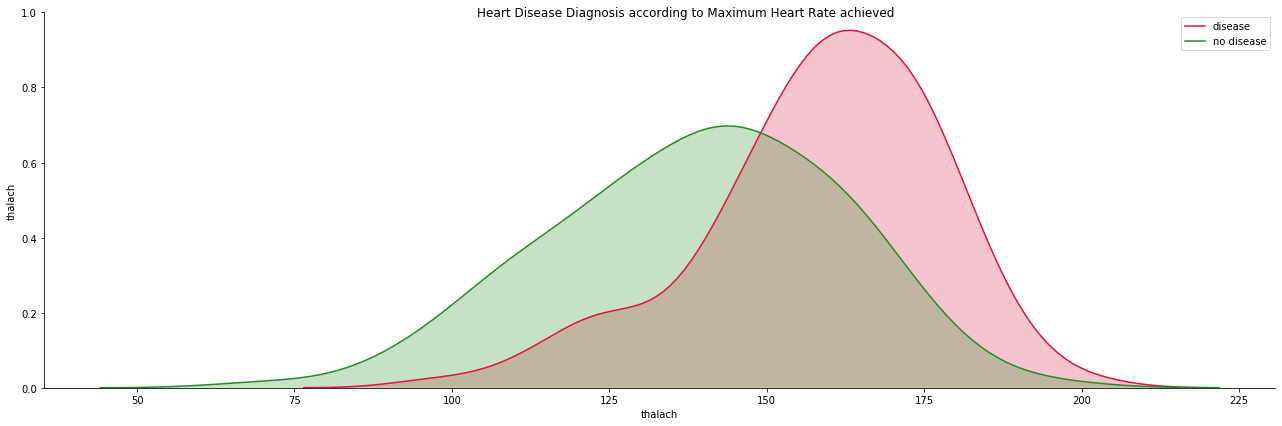

In [291]:
t = sns.pairplot(df,hue='target',vars=['thalach'],palette=('crimson','forestgreen'),diag_kind='kde',aspect=3,height=6)
t.fig.suptitle('Heart Disease Diagnosis according to Maximum Heart Rate achieved')
t._legend.remove()  # remove default pairplot legend as it was not appearing correctly
plt.legend()        # add legend 
plt.show(t)

#### Exercise Induced Angina vs Heart Disease Diagnosis

Interestingly, no chest pain during exercise had greater instances of heart disease than chest pain experienced during exercise

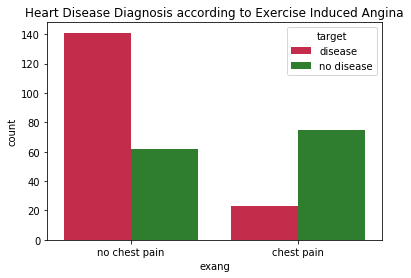

In [292]:
plt.title('Heart Disease Diagnosis according to Exercise Induced Angina')
sns.countplot(df['exang'],hue=df['target'],palette=('crimson','forestgreen'))

#### ST depression induced by exercise relative to rest vs Heart Disease Diagnosis

Majority of values are close to 0; 0 ST depression occurence interestingly has the most disease count.

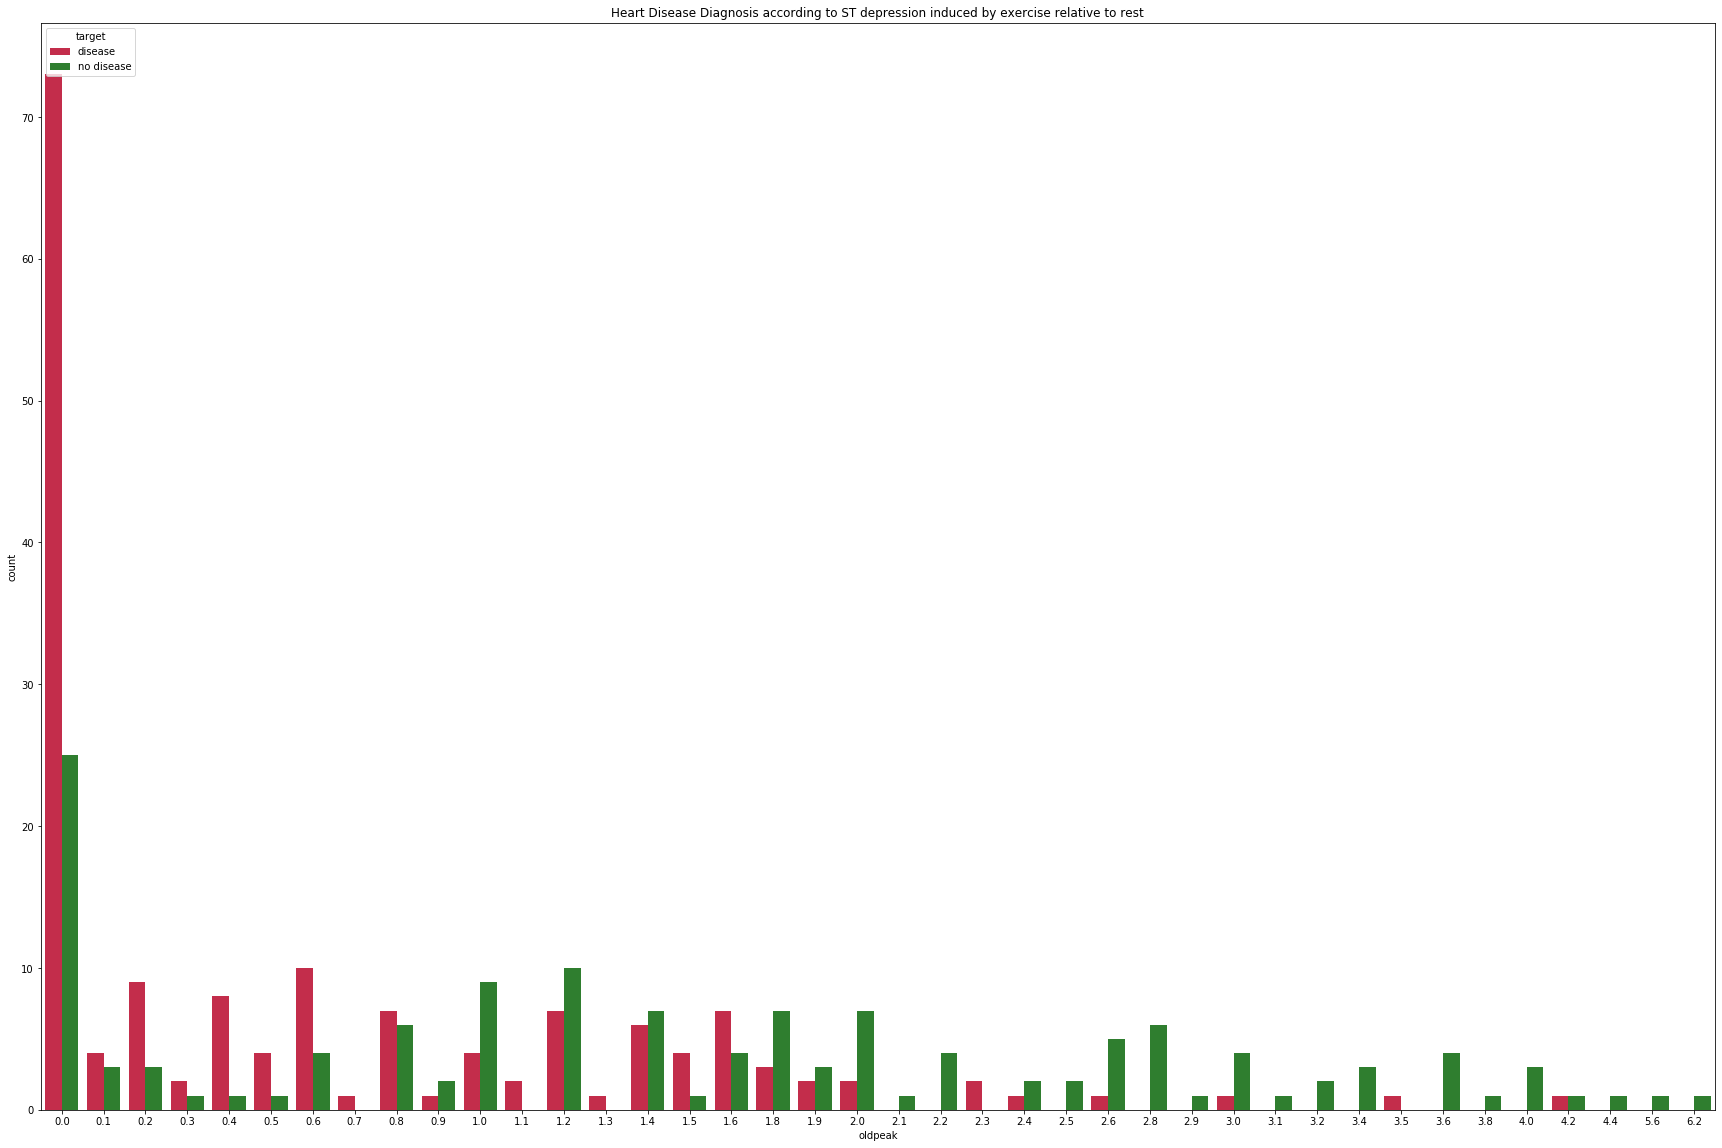

In [293]:
plt.figure(figsize=(30,20))
plt.title('Heart Disease Diagnosis according to ST depression induced by exercise relative to rest')
sns.countplot(df['oldpeak'],hue=df['target'],palette=('crimson','forestgreen'))

#### The slope of the peak exercise ST segment vs Heart Disease Diagnosis

Downsloping slope has the greatest instances of disease.

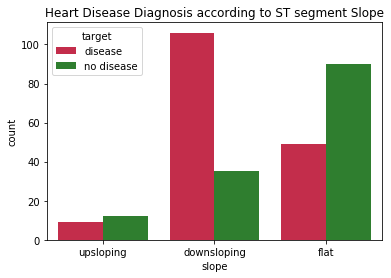

In [294]:
plt.title('Heart Disease Diagnosis according to ST segment Slope')
sns.countplot(df['slope'],hue=df['target'],palette=('crimson','forestgreen'))

#### Number of major vessels colored by fluoroscopy vs Heart Disease Diagnosis

The lowest amount of blood vessels shown via fluoroscopy is 0 and this category has greatest instances of disease.

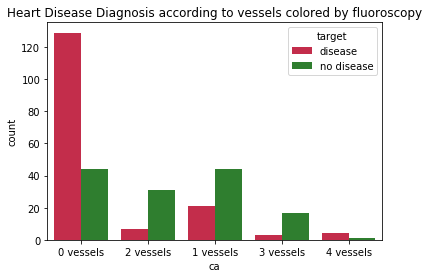

In [295]:
plt.title('Heart Disease Diagnosis according to vessels colored by fluoroscopy')
sns.countplot(df['ca'],hue=df['target'],palette=('crimson','forestgreen'))

#### Exercise thallium scintigraphic defects vs Heart Disease Diagnosis

Interestingly, normal blood flow has the greatest instances of heart disease.

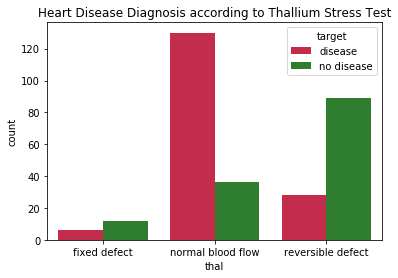

In [296]:
plt.title('Heart Disease Diagnosis according to Thallium Stress Test')
sns.countplot(df['thal'],hue=df['target'],palette=('crimson','forestgreen'))

#### Comparison of all Features

The greatest positive correlation is observed between following features:
<br>
0.39: The slope of the peak exercise ST segment vs Maximum Heart Rate achieved (slope vs thalach)
<br>
0.3: Chest Pain Type vs Maximum Heart Rate achieved (cp vs thalach)

(13.2, -0.2)

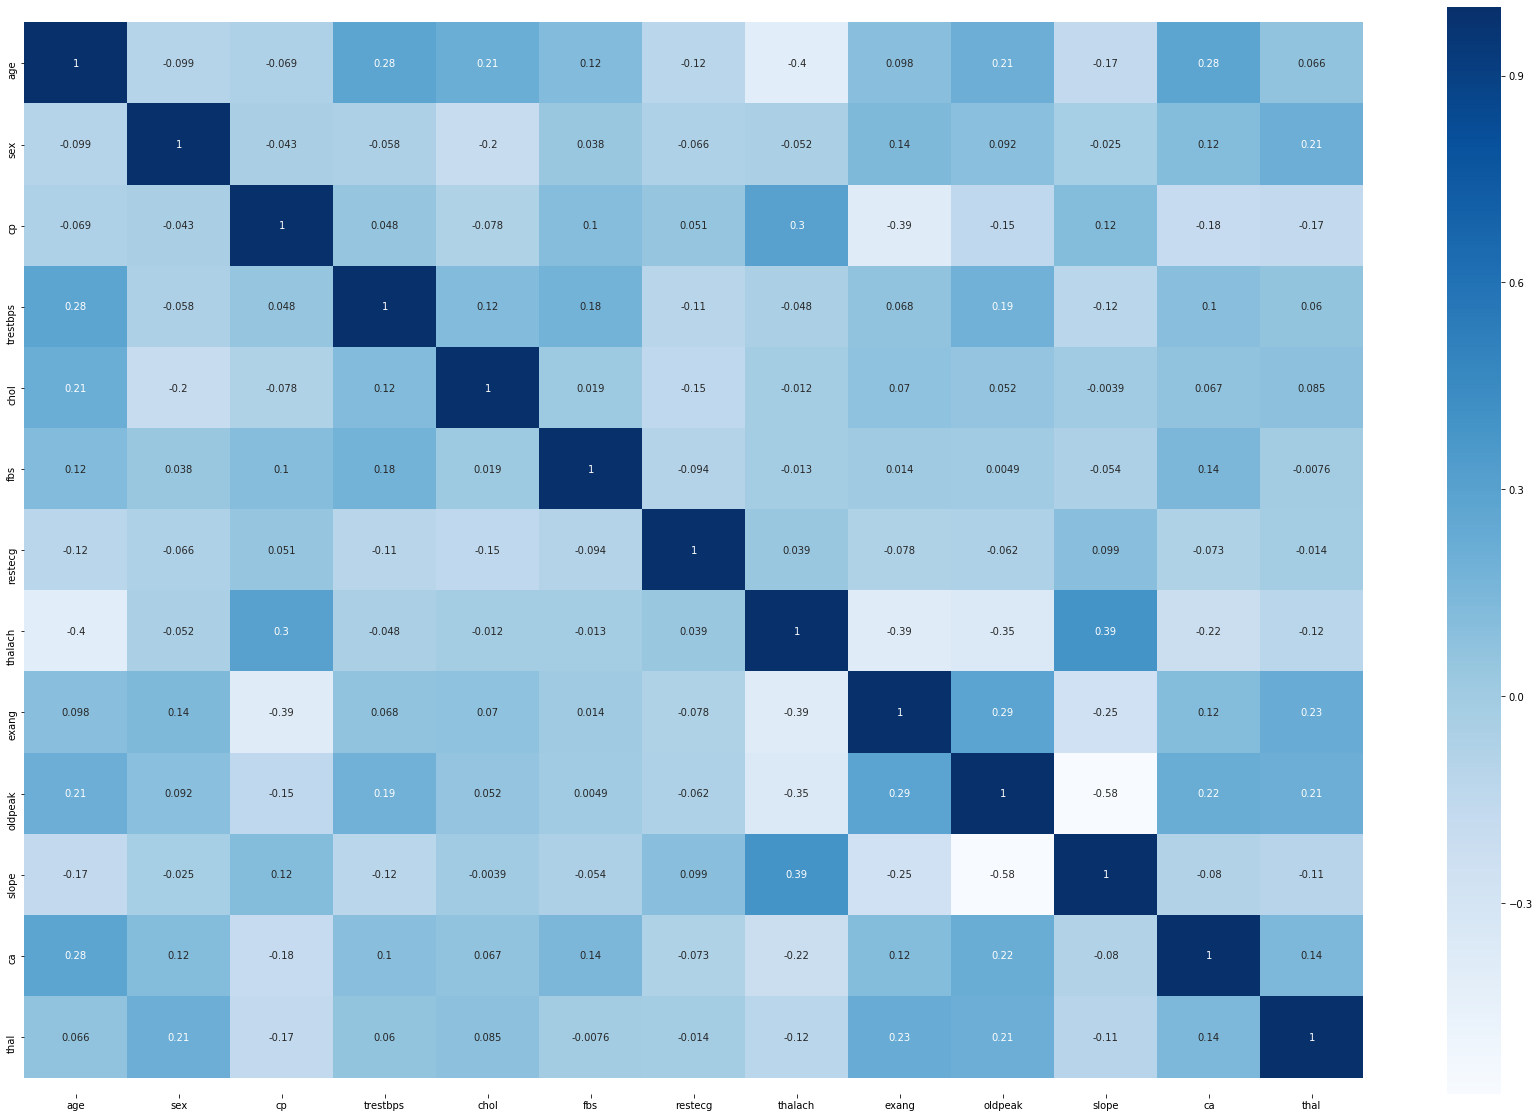

In [297]:
plt.figure(figsize=(30,20))
result = data.drop('target',axis=1)
corr = result.corr()
heatmap = sns.heatmap(corr,annot=True,cmap='Blues')
heatmap.set_ylim(len(corr)+0.2, -0.2) # To center the values on heatmap properly